In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#bring in the six packs
df_train = pd.read_csv('data/train.csv')

In [4]:
pd.cut(df_train['SalePrice'], 10).value_counts()

(106910.0, 178920.0]    723
(178920.0, 250930.0]    373
(34179.9, 106910.0]     148
(250930.0, 322940.0]    135
(322940.0, 394950.0]     51
(394950.0, 466960.0]     19
(466960.0, 538970.0]      4
(538970.0, 610980.0]      3
(610980.0, 682990.0]      2
(682990.0, 755000.0]      2
Name: SalePrice, dtype: int64

In [5]:
corr_matr = df_train.corr()

<AxesSubplot:>

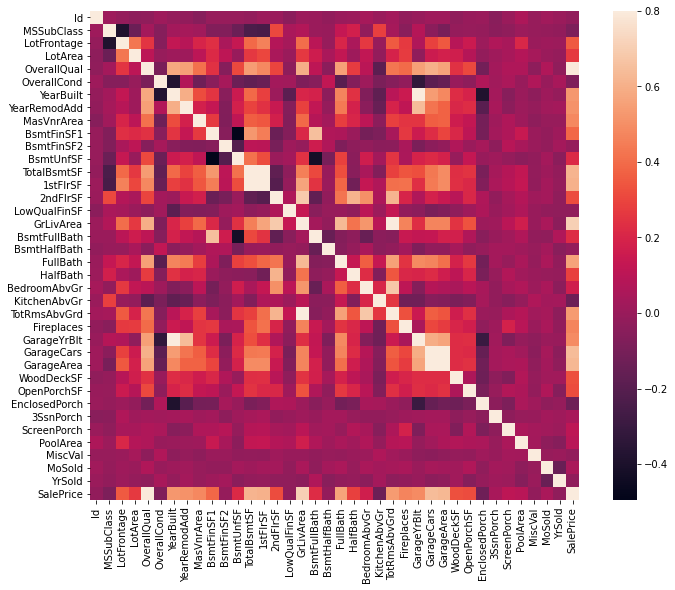

In [6]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matr,vmax=.8,square=True)

<AxesSubplot:>

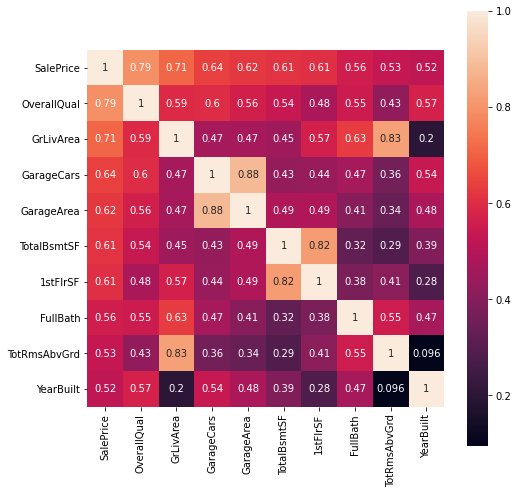

In [7]:
plt.figure(figsize=(8, 8))
colls = corr_matr.nlargest(10, 'SalePrice').index
df_train[colls].corr()
sns.heatmap(df_train[colls].corr(), annot=True, square=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

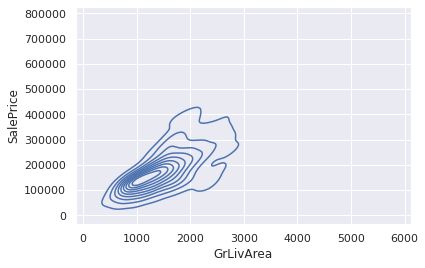

In [8]:
sns.set()
sns.kdeplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])

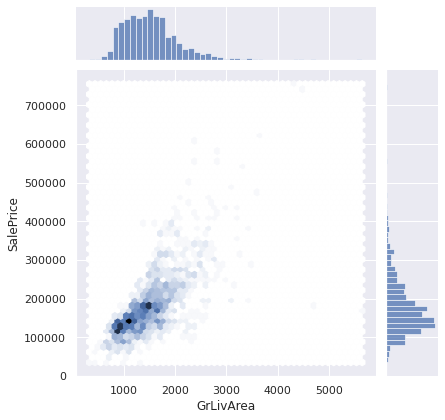

In [9]:
x = df_train['GrLivArea']

sns.jointplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], kind='hex')

In [10]:
from statsmodels import robust

In [11]:
robust.scale.mad(df_train['SalePrice'])

56338.88430321287

In [12]:
df_train['SalePrice'].std()

79442.50288288662

In [13]:
df_train['SalePrice'].quantile(0.75) - df_train['SalePrice'].quantile(0.25)

84025.0

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

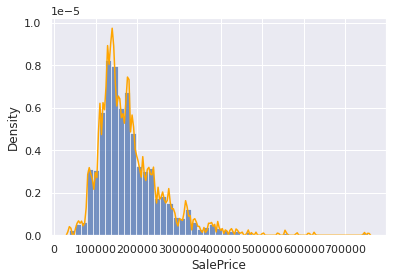

In [14]:

sns.kdeplot(x=df_train['SalePrice'], bw_adjust=0.1, color='orange')
sns.histplot(x=df_train['SalePrice'], stat='density')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

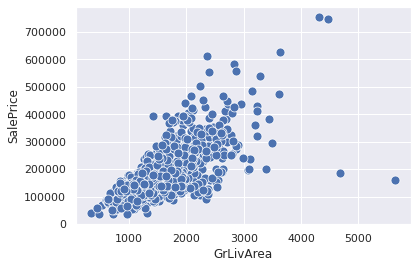

In [15]:
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], marker='o', color=None, s=80)

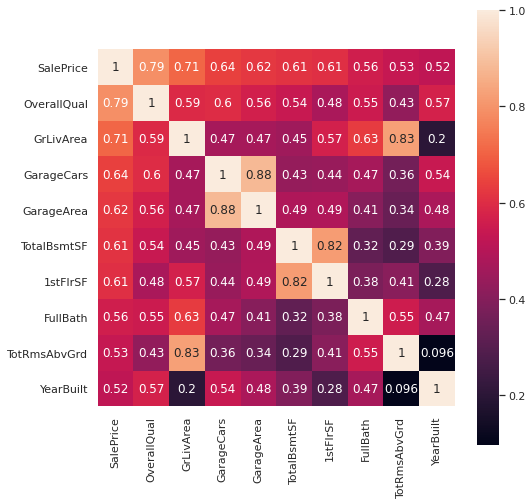

In [16]:
plt.figure(figsize=(8, 8))
corr_matr = df_train.corr()
colls = corr_matr.nlargest(10, 'SalePrice').index
df_train[colls].corr()
sns.heatmap(df_train[colls].corr(), annot=True, square=True);

In [ ]:
df_train['Ne']

In [20]:
df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [27]:
df_train.groupby('Neighborhood').transform(lambda x: x - x.min())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,40,29.0,4024,3,0,34,34,196.0,706,...,0,61,0,0,0,0,0,1,2,98500
1,0,0,50.0,51,1,3,2,0,0.0,978,...,298,0,0,0,0,0,0,1,1,19000
2,2,40,32.0,6824,3,0,32,33,162.0,486,...,0,42,0,0,0,0,0,8,2,113500
3,0,50,20.0,5708,3,2,5,20,0.0,216,...,0,35,272,0,0,0,0,1,0,49650
4,0,40,32.0,5060,1,0,10,10,350.0,655,...,192,84,0,0,0,0,0,11,2,60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1405,40,20.0,502,2,0,51,50,0.0,0,...,0,40,0,0,0,0,0,7,1,34000
1456,1449,0,39.0,4775,1,1,15,25,119.0,790,...,349,0,0,0,0,0,0,1,4,127500
1457,1454,50,26.0,5200,3,6,31,56,0.0,275,...,0,60,0,0,0,0,2500,4,4,176150
1458,1444,0,34.0,5659,2,3,32,46,0.0,49,...,366,0,112,0,0,0,0,3,4,54625


In [30]:
df_train.groupby('Neighborhood').transform(lambda x: print(type(x)))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1456,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1457,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1458,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
